In [33]:
#Importing require library for exploratory data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

SEED = 33

In [2]:
#Importing the dataset and storing to the varriable
df=pd.read_csv("diamond-prices-2022.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#Data cleaning by dropping the collumn named 'unnamed: 0'
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# Shape of the data
df.shape

(53943, 10)

In [6]:
df.info

<bound method DataFrame.info of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64
53940   0.71    Premium     E     SI1   60.5   55.0   2756  5.79  5.74  3.49
53941   0.71    Premium     F     SI1   59.8   62.0   2756  5.74  5.73  3.43
53942   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71  5.76  3.47

[53943 rows x 10 columns]>

In [7]:
# Data types of the collumns
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [8]:
#Checking for missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are No null values in the dataset.

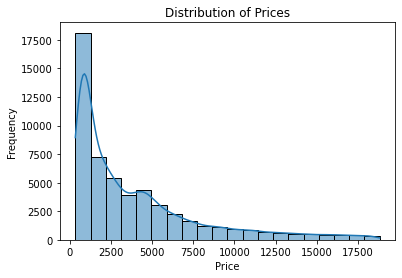

In [9]:
# Distribution Plots
sns.histplot(df['price'], bins=20, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

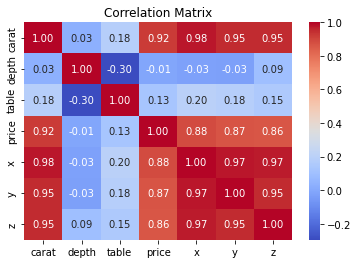

In [10]:
# Correlation
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Create new feature: Price per Carat
df['price_per_carat'] = df['price'] / df['carat']

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


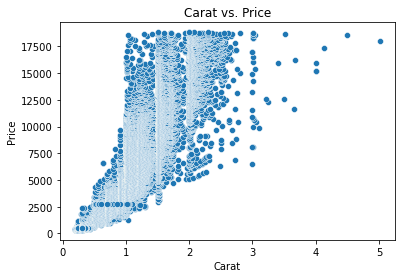

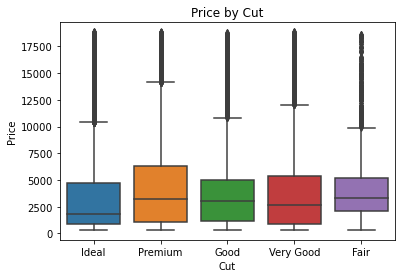

In [12]:
# Scatter Plot: Carat vs. Price
sns.scatterplot(x='carat', y='price', data=df)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs. Price')
plt.show()

# Box Plot: Price by Cut
sns.boxplot(x='cut', y='price', data=df)
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Price by Cut')
plt.show()

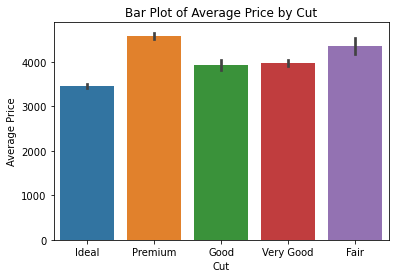

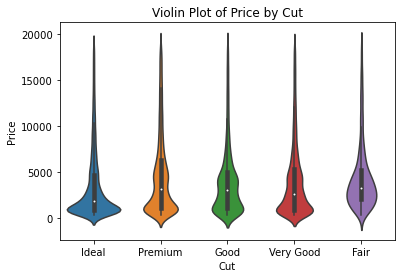

In [13]:
# Bar plot of average 'price' by 'cut'
sns.barplot(x='cut', y='price', data=df)
plt.xlabel('Cut')
plt.ylabel('Average Price')
plt.title('Bar Plot of Average Price by Cut')
plt.show()

# Assuming 'cut' is a categorical variable and 'price' is numerical
sns.violinplot(x='cut', y='price', data=df)
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Violin Plot of Price by Cut')
plt.show()

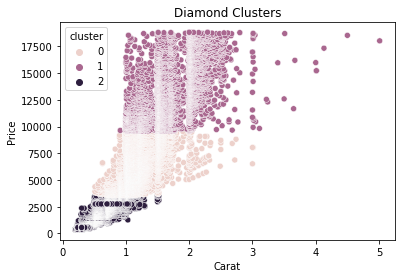

In [14]:
from sklearn.cluster import KMeans

# Assuming df is your DataFrame with the diamond data
X = df[['carat', 'depth', 'table', 'price']]

# Choose the number of clusters (k)
k = 3
kmeans = KMeans(n_clusters=k)
df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
sns.scatterplot(x='carat', y='price', hue='cluster', data=df)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Diamond Clusters')
plt.show()

Text(0.5, 1.0, 'z: depth in mm')

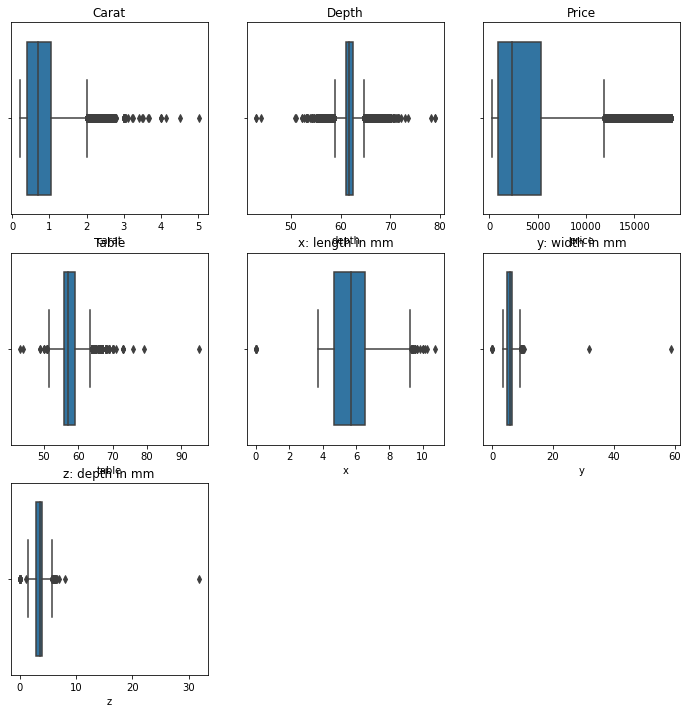

In [15]:
# Checking outliers for all the collumns

plt.figure(figsize=(12,12))

# for carat
plt.subplot(3, 3, 1)
sns.boxplot(df['carat'])
plt.title('Carat')

# for depth
plt.subplot(3, 3, 2)
sns.boxplot(df['depth'])
plt.title('Depth')

# for price
plt.subplot(3, 3, 3)
sns.boxplot(df['price'])
plt.title('Price')

# for table

plt.subplot(3, 3, 4)
sns.boxplot(df['table'])
plt.title('Table')

# for x
plt.subplot(3, 3, 5)
sns.boxplot(df['x'])
plt.title('x: length in mm')

# for y
plt.subplot(3, 3, 6)
sns.boxplot(df['y'])
plt.title('y: width in mm')

# for z
plt.subplot(3, 3, 7)
sns.boxplot(df['z'])
plt.title('z: depth in mm')

As one can clearly observe there are outliers in every numeric variable, but dealing with outliers is not neede here because of its domain since some exceptional diamonds can have higher carat, more depth high price etc.

So the above plot is just to check there are outliers or not.


Text(0.5, 0, 'Clarity')

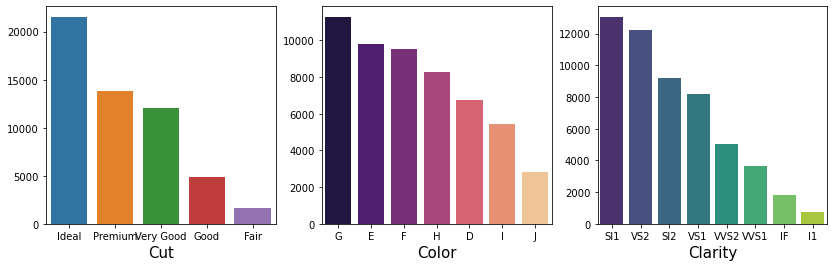

In [16]:
#checking catrgorical variables

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(y=df['cut'].value_counts().values, x=df['cut'].value_counts().index)
plt.xlabel('Cut', fontsize=15)

plt.subplot(1,3,2)
sns.barplot(y=df['color'].value_counts().values, x=df['color'].value_counts().index,palette='magma')
plt.xlabel('Color', fontsize=15)

plt.subplot(1,3,3)
sns.barplot(y=df['clarity'].value_counts().values, x=df['clarity'].value_counts().index,palette='viridis')
plt.xlabel('Clarity', fontsize=15)

One important insight from the above plots is that no of different categories are less than 10 in all 3 variables


In [17]:
#which columns are categorical and numerical
diamonds_cat = ['cut', 'color', 'clarity']
diamonds_num = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

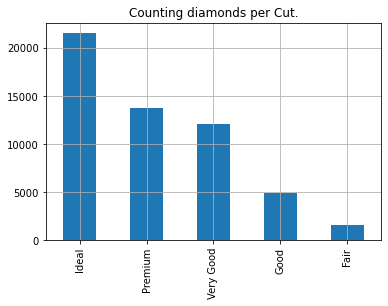

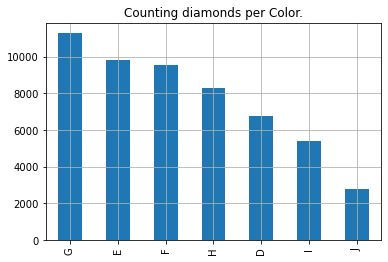

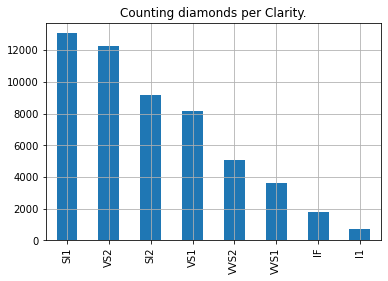

In [18]:
#counting diamond based on different catagory
for c in diamonds_cat:
    df[f'{c}'].value_counts().plot(kind='bar', title=f'Counting diamonds per {c.title()}.')
    plt.grid()
    plt.show()

In [19]:
df.loc[(df.price == df.price.max())]

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,cluster
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16,8219.650655,1


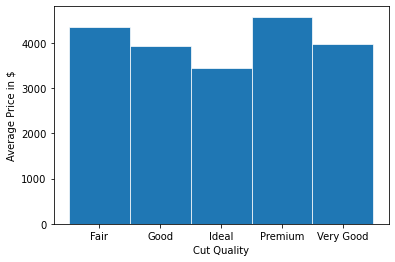

In [20]:
# Average price by cut quality of diamond
cut_quality=df.groupby(["cut"]).aggregate(avg_price=("price","mean"))
cut_quality=cut_quality.reset_index()
cut_quality.sort_values("avg_price",ascending=False)
y = cut_quality["avg_price"]
x = cut_quality["cut"]

# plot
fig, ax = plt.subplots()
plt.xlabel("Cut Quality")
plt.ylabel("Average Price in $")
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

In [21]:
#Maximum Average price per Cut and Clarity of diamond
cut_clarity=df.groupby(["cut","clarity"]).aggregate(avg_price=("price","mean"))
cut_clarity=cut_clarity.reset_index()
cut_clarity.sort_values(["cut","avg_price"],ascending=[True,False])
temp=cut_clarity.groupby(["cut"]).aggregate(max_price=("avg_price","max")).reset_index()
cut_clarity=cut_clarity.merge(temp,left_on="avg_price",right_on="max_price",how="right")
cut_clarity=cut_clarity[["cut_x","clarity","avg_price"]]
cut_clarity.rename(columns={"cut_x":"cut"},inplace=True)
cut_clarity


,cut,clarity,avg_price
0,Fair,SI2,5173.916309
1,Good,SI2,4580.260870
2,Ideal,SI2,4755.952656
3,Premium,SI2,5545.936928
4,Very Good,SI2,4988.688095


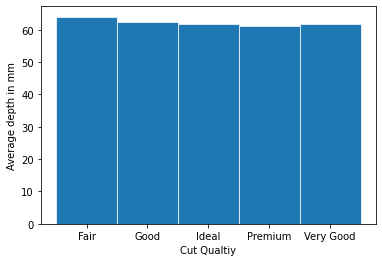

In [22]:
#Depth based on Cut quality
depth=df.groupby(["cut"]).aggregate(avg_depth=("depth","mean"))
depth=depth.reset_index()
depth.sort_values("avg_depth",ascending=False)
y = depth["avg_depth"]
x = depth["cut"]

# plot
fig, ax = plt.subplots()
plt.xlabel("Cut Qualtiy")
plt.ylabel("Average depth in mm")
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

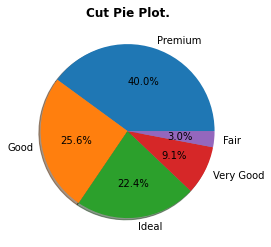

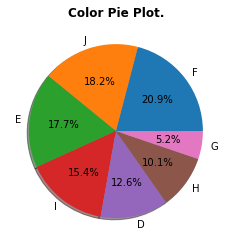

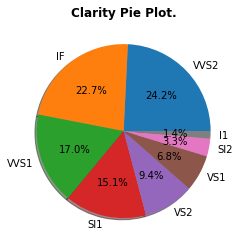

In [23]:
#Pie chart based on cut, color and clarity

for variable in ['cut', 'color', 'clarity']:
    plt.pie(df.value_counts(variable), shadow=True, autopct='%1.1f%%', labels=list(set(df[variable])))
    plt.title(f'{variable.title()} Pie Plot.', fontweight='bold')
    plt.show()

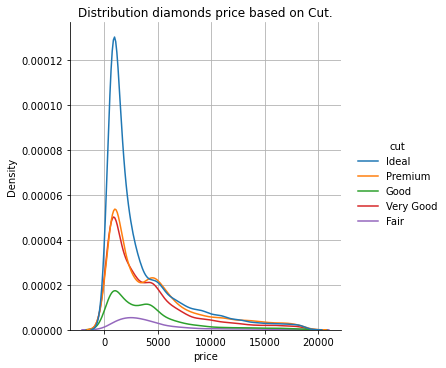

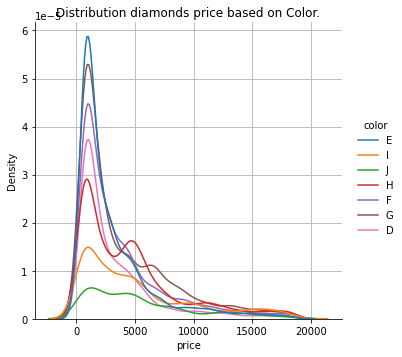

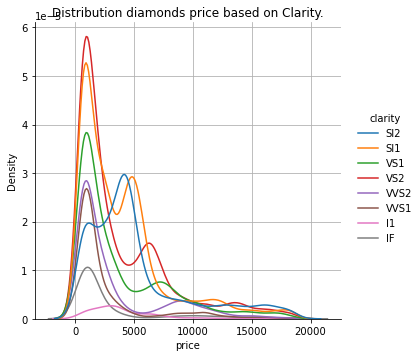

In [24]:
for c in ['cut', 'color', 'clarity']:
    sns.displot(data=df, x="price", hue=f"{c}", kind='kde')
    plt.title(f'Distribution diamonds price based on {c.title()}.')
    plt.grid()
    plt.show()

In [25]:
c = df[(df.price >= df.price.min()) & (df.price <= df.price.quantile(q=0.25))].shape[0]
d = df[(df.price > df.price.quantile(q=0.25)) & (df.price <= df.price.quantile(q=0.50))].shape[0]
e = df[(df.price > df.price.quantile(q=0.50)) & (df.price <= df.price.quantile(q=0.75))].shape[0]
f = df[(df.price > df.price.quantile(q=0.75)) & (df.price <= df.price.max())].shape[0]

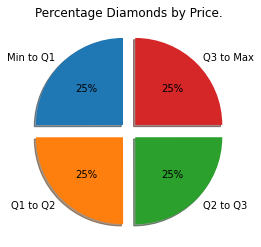

In [26]:
plt.pie([c, d, e, f], labels= ['Min to Q1', 'Q1 to Q2', 'Q2 to Q3', 'Q3 to Max'], explode = (0.1, 0.1, 0.1, 0.1), autopct='%.0f%%', shadow=True, startangle=90)
plt.title('Percentage Diamonds by Price.')
plt.show()

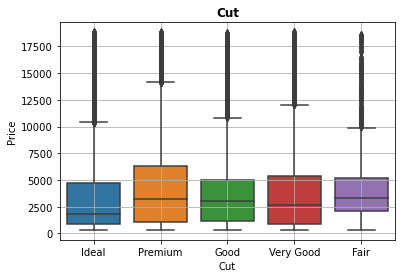

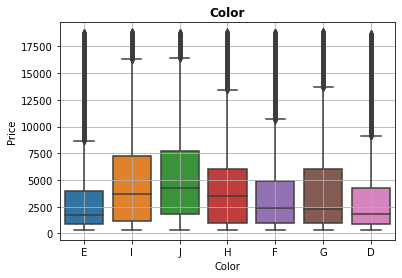

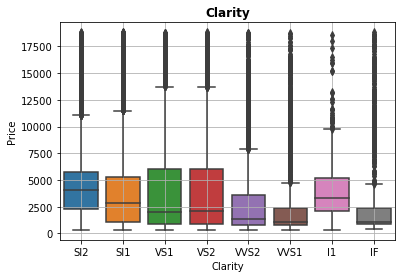

In [27]:
for c in ['cut', 'color', 'clarity']:
    ax = sns.boxplot(x=f'{c}', y="price", data=df, dodge=False).set_title(f'{c.title()}', fontweight = 'bold')
    plt.ylabel('Price')
    plt.xlabel(f'{c.title()}')
    plt.grid()
    plt.show()

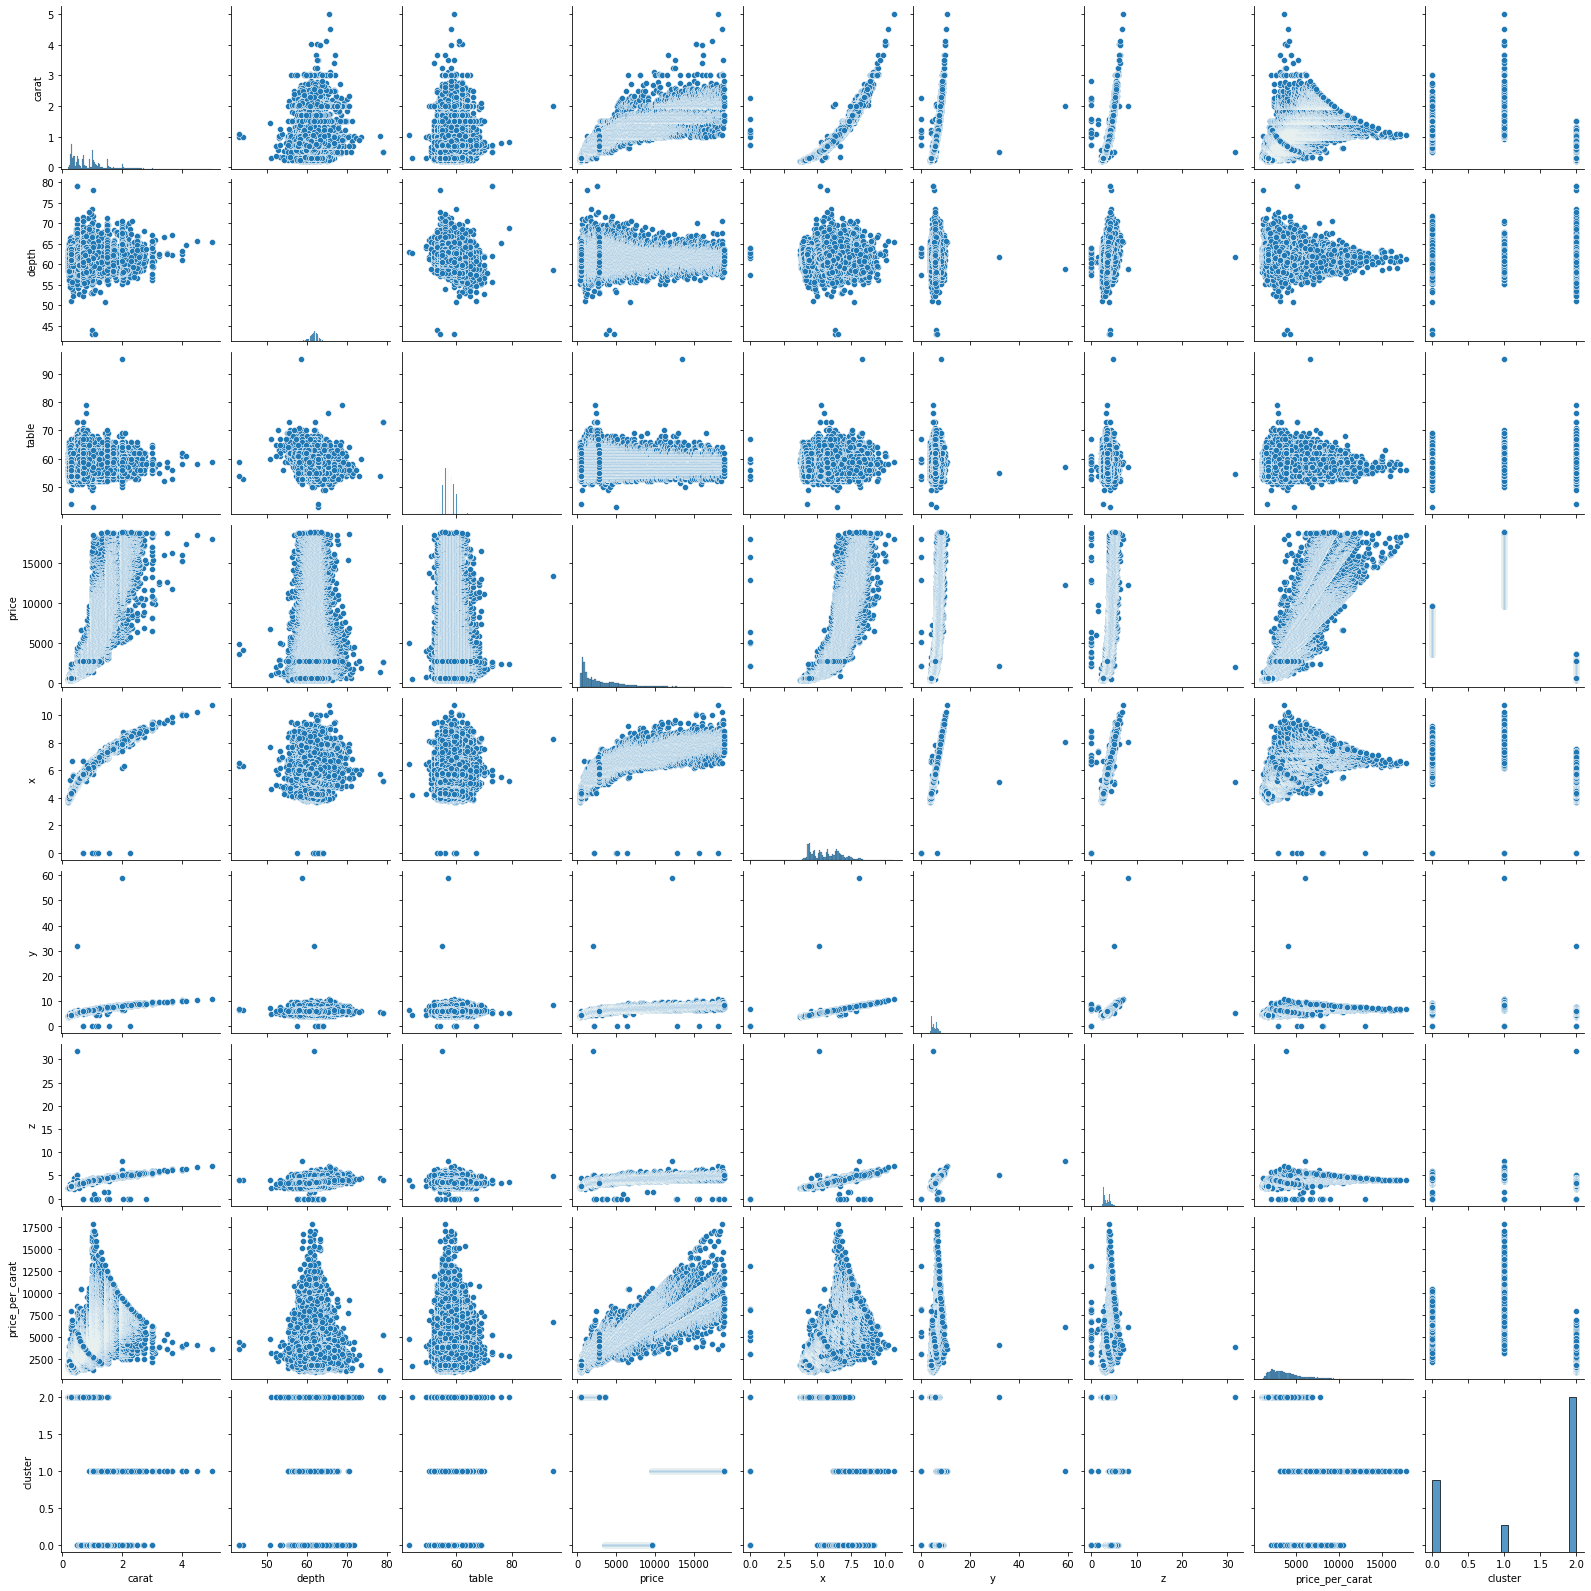

In [28]:
sns.pairplot(df)

In [36]:
# Preparing
y = df['price']
X = df.drop(['price'], axis=1)

In [34]:
# encoding
ordinal_columns = ['cut', 'color', 'clarity']
categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ['J', 'I', 'H', 'G', 'F', 'E', 'D'], ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
renamed_cols = ['Encoded' + column for column in ordinal_columns]

encoder = OrdinalEncoder(categories=categories)

X[renamed_cols] = encoder.fit_transform(X[ordinal_columns])
X_encoded = X.drop(ordinal_columns, axis=1)

In [35]:
# scaling
scaler = MinMaxScaler()

X_scailed = scaler.fit_transform(X_encoded)
X_new = pd.DataFrame(data=X_scailed, columns=X_encoded.columns)


In [37]:
# split train test
from sklearn.model_selection import train_test_split

test_size = 0.3
train_len = round(X_new.shape[0] * (1 - test_size))
X_test = X_new.iloc[train_len:]

X_train, X_valid, y_train, y_valid = train_test_split(X_new, y, test_size=test_size, random_state=SEED)

In [38]:
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (37760, 11)
Test shape: (16183, 11)


In [39]:
# modeling
model = RandomForestRegressor(n_estimators=160, max_depth=20, random_state=SEED)

model.fit(X_train, y_train)
preds = model.predict(X_valid)

scoring = 'r2'
kf = KFold(n_splits=5, shuffle=True, random_state=SEED)
mean_cv_train = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring).mean()
mean_cv_valid = cross_val_score(model, X_valid, y_valid, cv=kf, scoring=scoring).mean()
r2 = r2_score(y_valid, preds)

print(f'- Δcv ({scoring}): {(mean_cv_train - mean_cv_valid):.5f}')
print(f'- R2: {r2:.5f}')

- Δcv (r2): 0.00046
- R2: 0.99968


In [40]:
model.predict(X_test)

array([ 996.98125, 1002.3625 ,  996.71875, ..., 2755.675  , 2755.06875,
       2756.9125 ])